In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from src import *

## Similar transcripts
Apply dimension reduction to the medical transcription dataset and identify which transcriptions are close together.

In this exercice, we will first load again the transcript dataset as in the course and re generate the TFIDF features.

In [ ]:
df = pd.read_csv(ROOTDIR / 'data'/'raw' / 'prescription.zip', index_col=0)
df.dropna(subset=['transcription'], inplace=True)
print(df.shape)
df.head()

(4966, 5)


description  \
0   A 23-year-old white female presents with comp...   
1           Consult for laparoscopic gastric bypass.   
2           Consult for laparoscopic gastric bypass.   
3                             2-D M-Mode. Doppler.     
4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                            keywords  
0  allergy / immunology, allergic rhinitis, aller...  
1  bariatrics, laparoscopic gastric bypass, weigh...  
2  bariatrics, laparoscopic gastric bypass, heart...  
3  cardiovascular / pulmonary, 2-d m-mode, dopple...  
4  cardiovascular / pulmonary, 2-d, doppler, echo...

In [ ]:
import spacy
sp = spacy.load('en')

In [ ]:
all_stopwords = sp.Defaults.stop_words
from src.data.text import *
from fastcore.utils import parallel
texts = pd.DataFrame({'text':parallel(preproc_text, df.transcription.dropna().values, 
                                      n_workers=10)})
texts

text
0     subjective this 23 year old white female prese...
1     past medical history -PRON- have difficulty cl...
2     history of present illness i have see abc toda...
3     2 d m mode 1 left atrial enlargement with left...
4     1 the left ventricular cavity size and wall th...
...                                                 ...
4961  history i have the pleasure of meet and evalua...
4962  admit diagnosis kawasaki disease discharge dia...
4963  subjective this be a 42 year old white female ...
4964  chief complaint this 5 year old male present t...
4965  history a 34 year old male present today self ...

[4966 rows x 1 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    max_df=0.9, # remove words that appear in 90% of the texts
    min_df=10, #remove words that do not appear at least 5 times in the corpus
    max_features=None, # Keep as much features as possible
    stop_words='english'
)
features_tfidf = tfidf.fit_transform(texts.text).todense()
features_tfidf.shape

(4966, 6999)

In [ ]:
import umap
tf = umap.UMAP(random_state=42, low_memory=True,
                n_neighbors=100,
                n_components=2,)
emb = tf.fit_transform(features_tfidf)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(emb, emb, alpha=0.05)

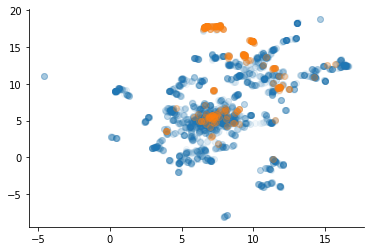

In [ ]:
fig, ax = plt.subplots()
mask = df.medical_specialty==' Gastroenterology'
ax.scatter(emb[~mask,0], emb[~mask,1], alpha=0.05)
ax.scatter(emb[mask,0], emb[mask,1], alpha=0.3);